In [45]:
import pandas as pd

df = pd.read_csv("credit_card.csv")


In [46]:
print(df.head())


   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [47]:
selected_features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
X = df[selected_features]


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [50]:
cluster_labels = kmeans.labels_


In [51]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Score:", score)


Davies-Bouldin Score: 0.679698688143959


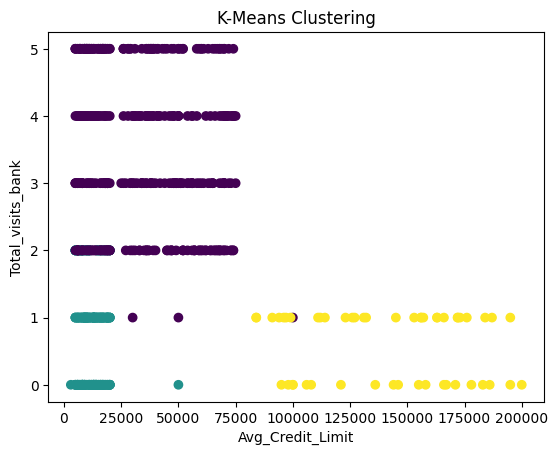

In [52]:
import matplotlib.pyplot as plt

# Contoh visualisasi dengan dua fitur
plt.scatter(X['Avg_Credit_Limit'], X['Total_visits_bank'], c=cluster_labels)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_visits_bank')
plt.title('K-Means Clustering')
plt.show()
